# Gradient Descent

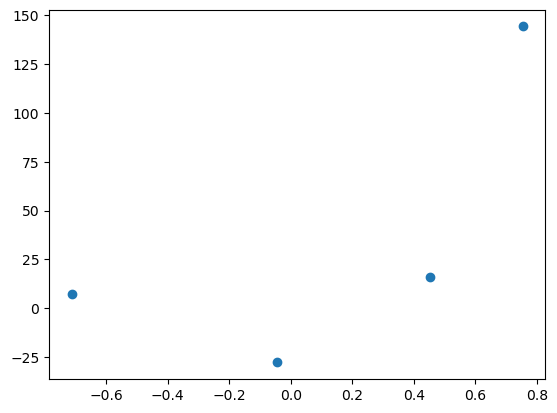

In [3]:
from sklearn.datasets import make_regression
import numpy as np
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [6]:
# Lets apply OLS
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)  
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

In [5]:
reg.coef_

array([78.35063668])

In [7]:
reg.intercept_

26.15963284313262

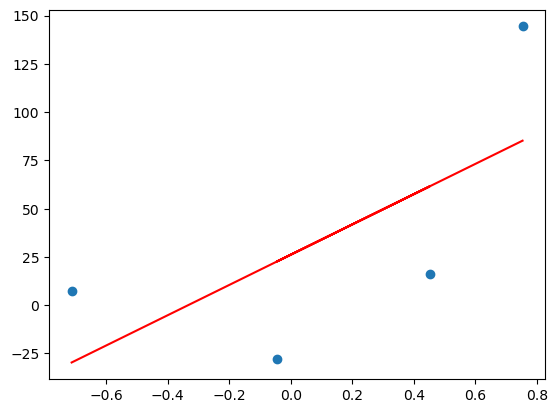

In [8]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color="red")

In [9]:
# Applying GD assuming Slope = constant
# Let's assume the starting value for intercept b = 0
y_pred = ((78.35 * X) + 0 ).reshape(4)

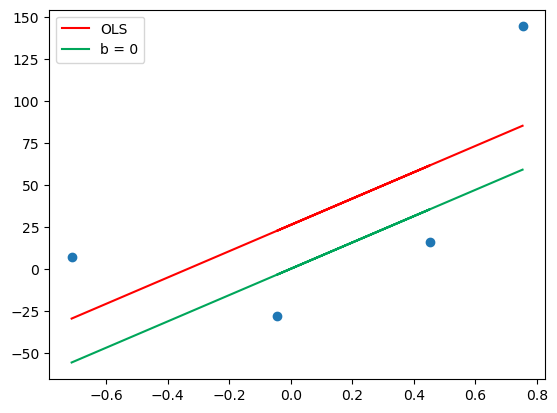

In [10]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

In [11]:
m = 78.35
b = 0
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-209.27763408209216

In [12]:
# Let's take Learning Rate = 0.1
lr = 0.1

step_size = loss_slope*lr
step_size


-20.927763408209216

In [13]:
b = b - step_size
b

20.927763408209216

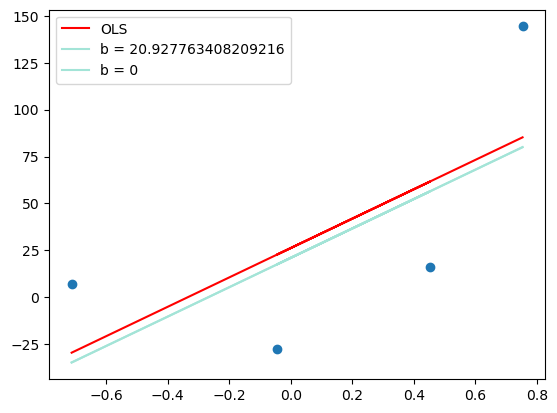

In [16]:
y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

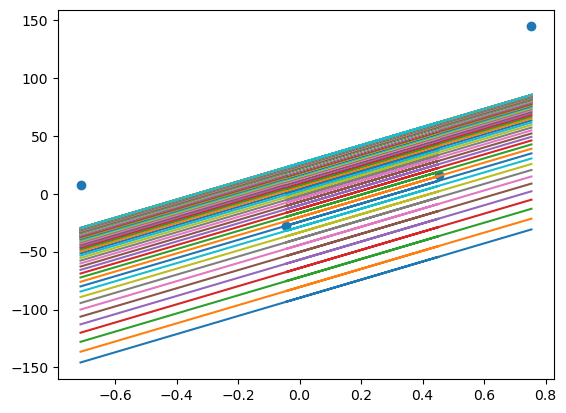

In [19]:
# Iterations and Epochs

b = -100
m = 78.35
lr = 0.01

epochs = 100

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m * X + b

  plt.plot(X,y_pred)

plt.scatter(X,y)


### By Scratch

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[78.35063668]
26.15963284313262


In [23]:
m = 29.19

In [35]:
class GDRegressor : 
    def __init__(self,learning_rate,epochs):
        self.m = 29.19
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    def fit(self,X,y):
        # Calculate b using GD
        for i in range(self.epochs):
            loss_slope = -2 * np.sum(y - m*X.ravel() - self.b)
            self.b = self.b - (self.lr * loss_slope)
            print(loss_slope,self.b)
        print(self.b)

In [36]:
gd = GDRegressor(0.001,100)
gd.fit(X,y)

-1213.392341022389 -118.78660765897762
-1203.6852022942098 -117.5829224566834
-1194.0557206758563 -116.38886673600754
-1184.5032749104494 -115.20436346109709
-1175.0272487111656 -114.02933621238593
-1165.6270307214763 -112.86370918166445
-1156.3020144757047 -111.70740716718875
-1147.051598359899 -110.56035556882885
-1137.8751855730197 -109.42248038325583
-1128.7721840884356 -108.2937081991674
-1119.7420066157283 -107.17396619255167
-1110.7840705628023 -106.06318212198887
-1101.8977979983001 -104.96128432399057
-1093.0826156143135 -103.86820170837626
-1084.337954689399 -102.78386375368686
-1075.663251051884 -101.70820050263498
-1067.0579450434689 -100.64114255759151
-1058.521481483121 -99.58262107610838
-1050.053309631256 -98.53256776647713
-1041.652883154206 -97.49091488332293
-1033.3196600889723 -96.45759522323395
-1025.0531028082605 -95.4325421204257
-1016.8526779857946 -94.4156894424399
-1008.7178565619082 -93.406971585878
-1000.648113709413 -92.40632347216858
-992.6429287997377 -91

In [6]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

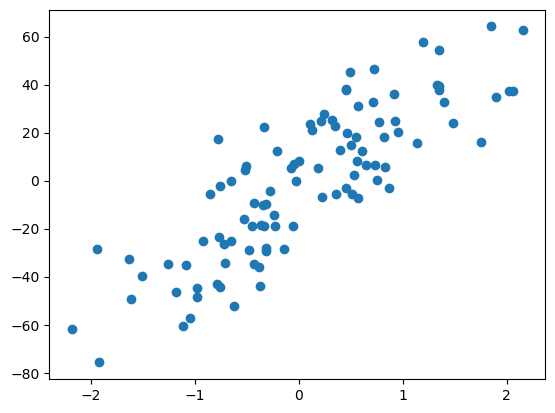

In [3]:
plt.scatter(X,y)


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [19]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783816


In [20]:
# np.mean(cross_val_score(lr,X,y,scoring="r2",cv=10))
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661013

In [23]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    def fit(self,X,y):
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b) * X.ravel())

            self.b = self.b - self.lr * loss_slope_b
            self.m = self.m - self.lr * loss_slope_m
            print(self.m,self.b)
    def predict(self,X):
        return self.m * X + self.b

In [24]:
gd = GDRegressor(0.001,50)

In [25]:
gd.fit(X_train,y_train)

90.04629892211885 -101.74579222551124
81.45526459363266 -86.33159805246282
74.04311055612814 -73.31405765077903
67.65034931588339 -62.31925945284707
62.13866746737299 -53.03182533775812
57.388186604948714 -45.185716863687844
53.295065421356476 -38.55649030694167
49.76940295441548 -32.95477146340025
46.73340716346203 -28.22075749072971
44.119796891300396 -24.219583614929572
41.87040880112064 -20.837418214159634
39.93498408345094 -17.978171400492243
38.27011262242971 -15.560720396685232
36.83831491296171 -13.516570296741047
35.607244351591326 -11.787881665108163
34.54899460565792 -10.325807255788309
33.63949861883491 -9.089089243664636
32.8580074572265 -8.042876028669264
32.186638658597445 -7.157724128122485
31.60998503668936 -6.4087561063536
31.114776030309518 -5.774950065535027
30.689584689018417 -5.238540073731229
30.324574268511547 -4.7845101500234595
30.01127918260372 -4.400167158554662
29.742415737240734 -4.074780264475415
29.51171866615403 -3.7992765432249187
29.31380000749783 -3.

In [26]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6343842836315579

In [1]:
# Batch Gradient Descent


In [2]:
from sklearn.datasets import  load_diabetes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
X,y = load_diabetes(return_X_y=True)


In [4]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [7]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568969

In [29]:
class GDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            # update all the coef and the intercept
            y_hat = np.dot(X_train,self.coef_) + self.intercept_
            #print("Shape of y_hat",y_hat.shape)
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            
            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [31]:
gdr = GDRegressor(epochs=1000,learning_rate=0.5)
gdr.fit(X_train,y_train)

152.01351687661833 [  14.38990585 -173.7235727   491.54898524  323.91524824  -39.32648042
 -116.01061213 -194.04077415  103.38135565  451.63448787   97.57218278]


In [32]:

y_pred = gdr.predict(X_test)

r2_score(y_test,y_pred)

0.4534503034722803

In [ ]:
# Stochastic GD


In [47]:

class SGDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                idx = np.random.randint(0,X_train.shape[0])
                
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                
                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)
                
                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [55]:
sgd = SGDRegressor(learning_rate=0.01,epochs=50)
sgd.fit(X_train,y_train)
y_pred = sgd.predict(X_test)


159.00462463229852 [  48.33540761  -64.75419053  354.33070739  246.32638534   11.78293032
  -34.81212489 -177.04467633  131.41008709  322.8874989   137.58437618]


In [56]:
y_pred = sgd.predict(X_test)
r2_score(y_test,y_pred)

0.42756855289202966

In [61]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)
reg.fit(X_train,y_train)

c:\Users\ANTARIKSHYA\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(learning_rate='constant', max_iter=100)

In [62]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4329323335091292

In [64]:
# Mini Batch Gradient Descent

In [65]:
from sklearn.datasets import  load_diabetes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [66]:
X,y = load_diabetes(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


0.4399338661568969

In [67]:
import random

class MBGDRegressor:
    
    def __init__(self,batch_size,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            
            for j in range(int(X_train.shape[0]/self.batch_size)):
                
                idx = random.sample(range(X_train.shape[0]),self.batch_size)
                
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                #print("Shape of y_hat",y_hat.shape)
                intercept_der = -2 * np.mean(y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [68]:
mbr = MBGDRegressor(batch_size=int(X_train.shape[0]/50),learning_rate=0.01,epochs=100)
mbr.fit(X_train,y_train)



149.42371722095015 [  28.57711065 -146.17389047  451.42139249  301.91867113  -13.19447127
  -83.48678709 -186.08808449  115.55399513  407.15914059  108.16803355]


In [69]:
y_pred = mbr.predict(X_test)
r2_score(y_test,y_pred)


0.45222224470015515

In [70]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(learning_rate='constant',eta0=0.1)
batch_size = 35

for i in range(100):
    
    idx = random.sample(range(X_train.shape[0]),batch_size)
    sgd.partial_fit(X_train[idx],y_train[idx])
sgd.coef_


array([  57.33601053,  -86.72813169,  350.7723461 ,  238.01583609,
         12.18547867,  -42.36348516, -159.51739055,  115.74658819,
        318.80139757,  127.87251228])

In [71]:
sgd.intercept_

array([162.62346334])

In [72]:
y_pred = sgd.predict(X_test)

In [74]:
r2_score(y_test,y_pred)

0.41934064086904443